In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# 1 Splitting an object into groups

In [2]:
df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C': np.random.randn(8),
    'D': np.random.randn(8)
})
df

,A,B,C,D
0,foo,one,1.789940,-0.587384
1,bar,one,-0.168750,0.207730
2,foo,two,0.069431,2.135291
3,bar,three,-1.137496,-0.328516
4,foo,two,0.329921,-0.238912
5,bar,two,1.821423,0.038540
6,foo,one,1.028053,0.998780
7,foo,three,-0.157989,0.322727


In [7]:
grouped = df.groupby('A'); 
grouped.first()

,B,C,D
A,,,
bar,one,-0.16875,0.207730
foo,one,1.78994,-0.587384


In [8]:
grouped = df.groupby(['A', 'B']); 
grouped.first()

C         D
A   B                        
bar one   -0.168750  0.207730
    three -1.137496 -0.328516
    two    1.821423  0.038540
foo one    1.789940 -0.587384
    three -0.157989  0.322727
    two    0.069431  2.135291

In [5]:
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant'

In [9]:
grouped = df.groupby(get_letter_type, axis=1)
grouped.first()

,consonant,vowel
0,one,foo
1,one,bar
2,two,foo
3,three,bar
4,two,foo
5,two,bar
6,one,foo
7,three,foo


In [12]:
lst = [1,2,3,1,2,3]

In [13]:
s = pd.Series([1, 2, 3, 10, 20, 30], lst)

In [14]:
grouped = s.groupby(level=0)

In [15]:
grouped.first()

1    1
2    2
3    3
dtype: int64

In [16]:
grouped.last()

1    10
2    20
3    30
dtype: int64

In [17]:
grouped.sum()

1    11
2    22
3    33
dtype: int64

# 2 GroupBy sorting

In [18]:
df2 = pd.DataFrame({
    'X': ['B', 'B', 'A', 'A'], 
    'Y': [1, 2, 3, 4]
})

In [19]:
df2.groupby(['X']).sum()

,Y
X,
A,7
B,3


In [20]:
df2.groupby(['X'], sort=False).sum()

,Y
X,
B,3
A,7


In [21]:
df3 = pd.DataFrame({
    'X': ['A',' B', 'A', 'B'],
    'Y': [1, 4, 3, 2]
})

In [22]:
df3.groupby(['X']).get_group('A')

,X,Y
0,A,1
2,A,3


In [23]:
df3.groupby(['X']).get_group('B')

,X,Y
3,B,2


# 3 Group by object attributes

In [24]:
df

,A,B,C,D
0,foo,one,1.789940,-0.587384
1,bar,one,-0.168750,0.207730
2,foo,two,0.069431,2.135291
3,bar,three,-1.137496,-0.328516
4,foo,two,0.329921,-0.238912
5,bar,two,1.821423,0.038540
6,foo,one,1.028053,0.998780
7,foo,three,-0.157989,0.322727


In [25]:
df.groupby('A').groups

{'bar': Int64Index([1, 3, 5], dtype='int64'),
 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}

In [26]:
df.groupby(get_letter_type, axis=1).groups

{'consonant': Index(['B', 'C', 'D'], dtype='object'),
 'vowel': Index(['A'], dtype='object')}

In [27]:
grouped = df.groupby(['A', 'B'])

In [28]:
grouped.groups

{('bar', 'one'): Int64Index([1], dtype='int64'),
 ('bar', 'three'): Int64Index([3], dtype='int64'),
 ('bar', 'two'): Int64Index([5], dtype='int64'),
 ('foo', 'one'): Int64Index([0, 6], dtype='int64'),
 ('foo', 'three'): Int64Index([7], dtype='int64'),
 ('foo', 'two'): Int64Index([2, 4], dtype='int64')}

# 4 GroupBy with MultiIndex

In [33]:
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

In [34]:
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])

In [35]:
s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one       0.975100
       two      -0.208038
baz    one       1.058364
       two      -1.032917
foo    one      -1.272013
       two       0.640816
qux    one      -0.530623
       two       0.760018
dtype: float64

In [36]:
grouped = s.groupby(level=0)

In [37]:
grouped.sum()

first
bar    0.767062
baz    0.025446
foo   -0.631197
qux    0.229396
dtype: float64

In [38]:
s.groupby(level='second').sum()

second
one    0.230828
two    0.159879
dtype: float64

In [39]:
s.sum(level='second')

second
one    0.230828
two    0.159879
dtype: float64

In [40]:
s

first  second
bar    one       0.975100
       two      -0.208038
baz    one       1.058364
       two      -1.032917
foo    one      -1.272013
       two       0.640816
qux    one      -0.530623
       two       0.760018
dtype: float64

In [41]:
s.groupby(level=['first', 'second']).sum()

first  second
bar    one       0.975100
       two      -0.208038
baz    one       1.058364
       two      -1.032917
foo    one      -1.272013
       two       0.640816
qux    one      -0.530623
       two       0.760018
dtype: float64

# 5 Grouping DataFrame with index Levels and Columns

In [42]:
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

In [43]:
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])

In [46]:
df = pd.DataFrame({
    'A': [1, 1, 1, 1, 2, 2, 3, 3],
    'B': np.arange(8)
}, index=index)
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [49]:
df.groupby([pd.Grouper(level=0), 'A']).sum()

,,B
first,A,
bar,1,1
baz,1,5
foo,2,9
qux,3,13


In [50]:
df.groupby([pd.Grouper(level=1), 'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [51]:
df.groupby([pd.Grouper(level='second'), 'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [53]:
df.groupby(['second', 'A']).sum() # equivalente

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

# 6 Iterating through groups

In [57]:
grouped = df.groupby('A')

In [59]:
for name, group in grouped:
    print(name)
    print(group)

1
              A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
2
              A  B
first second      
foo   one     2  4
      two     2  5
3
              A  B
first second      
qux   one     3  6
      two     3  7


In [61]:
for name, group in df.groupby(['A', 'B']):
    print(name)
    print(group)

(1, 0)
              A  B
first second      
bar   one     1  0
(1, 1)
              A  B
first second      
bar   two     1  1
(1, 2)
              A  B
first second      
baz   one     1  2
(1, 3)
              A  B
first second      
baz   two     1  3
(2, 4)
              A  B
first second      
foo   one     2  4
(2, 5)
              A  B
first second      
foo   two     2  5
(3, 6)
              A  B
first second      
qux   one     3  6
(3, 7)
              A  B
first second      
qux   two     3  7


# 7 Aggregation

In [67]:
df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C': np.random.randn(8),
    'D': np.random.randn(8)
})
df

,A,B,C,D
0,foo,one,-1.193697,-0.453591
1,bar,one,1.443124,0.049115
2,foo,two,-1.105058,0.222452
3,bar,three,0.320072,-0.030625
4,foo,two,0.141449,0.614382
5,bar,two,1.369393,1.188102
6,foo,one,-0.415038,0.126334
7,foo,three,2.062648,-0.443728


In [68]:
grouped = df.groupby('A')

In [69]:
grouped

In [71]:
grouped.aggregate(np.sum)

,C,D
A,,
bar,3.132589,1.206593
foo,-0.509697,0.065849


In [72]:
grouped = df.groupby(['A', 'B'])

In [73]:
grouped.aggregate(np.sum)

C         D
A   B                        
bar one    1.443124  0.049115
    three  0.320072 -0.030625
    two    1.369393  1.188102
foo one   -1.608735 -0.327257
    three  2.062648 -0.443728
    two   -0.963609  0.836834

In [74]:
grouped = df.groupby(['A', 'B'], as_index=False)

In [75]:
grouped.aggregate(np.sum)

,A,B,C,D
0,bar,one,1.443124,0.049115
1,bar,three,0.320072,-0.030625
2,bar,two,1.369393,1.188102
3,foo,one,-1.608735,-0.327257
4,foo,three,2.062648,-0.443728
5,foo,two,-0.963609,0.836834


In [77]:
df.groupby(['A', 'B'], as_index=False).sum() # equivalente a anterior

,A,B,C,D
0,bar,one,1.443124,0.049115
1,bar,three,0.320072,-0.030625
2,bar,two,1.369393,1.188102
3,foo,one,-1.608735,-0.327257
4,foo,three,2.062648,-0.443728
5,foo,two,-0.963609,0.836834


In [78]:
df.groupby(['A', 'B']).sum().reset_index() 

,A,B,C,D
0,bar,one,1.443124,0.049115
1,bar,three,0.320072,-0.030625
2,bar,two,1.369393,1.188102
3,foo,one,-1.608735,-0.327257
4,foo,three,2.062648,-0.443728
5,foo,two,-0.963609,0.836834


In [79]:
grouped.size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [80]:
grouped.describe()

C                                                                        \
  count      mean       std       min       25%       50%       75%       max   
0   1.0  1.443124       NaN  1.443124  1.443124  1.443124  1.443124  1.443124   
1   1.0  0.320072       NaN  0.320072  0.320072  0.320072  0.320072  0.320072   
2   1.0  1.369393       NaN  1.369393  1.369393  1.369393  1.369393  1.369393   
3   2.0 -0.804368  0.550595 -1.193697 -0.999032 -0.804368 -0.609703 -0.415038   
4   1.0  2.062648       NaN  2.062648  2.062648  2.062648  2.062648  2.062648   
5   2.0 -0.481805  0.881414 -1.105058 -0.793431 -0.481805 -0.170178  0.141449   

      D                                                                        
  count      mean       std       min       25%       50%       75%       max  
0   1.0  0.049115       NaN  0.049115  0.049115  0.049115  0.049115  0.049115  
1   1.0 -0.030625       NaN -0.030625 -0.030625 -0.030625 -0.030625 -0.030625  
2   1.0  1.188102       NaN  1.188102  1.188102  1.188102  1.188102  1.188102  
3   2.0 -0.163628  0.410069 -0.453591 -0.308610 -0.163628 -0.018647  0.126334  
4   1.0 -0.443728       NaN -0.443728 -0.443728 -0.443728 -0.443728 -0.443728  
5   2.0  0.418417  0.277136  0.222452  0.320434  0.418417  0.516399  0.614382

In [81]:
grouped = df.groupby('A')

In [83]:
grouped['C'].agg([np.sum, np.mean, np.std])

,sum,mean,std
A,,,
bar,3.132589,1.044196,0.628193
foo,-0.509697,-0.101939,1.326734


In [85]:
(grouped['C'].agg([np.sum, np.mean, np.std])
    .rename(columns={'sum': 'foo',
        'mean': 'bar',
        'std': 'baz'})
)

,foo,bar,baz
A,,,
bar,3.132589,1.044196,0.628193
foo,-0.509697,-0.101939,1.326734


In [86]:
df.groupby('A').sum()

,C,D
A,,
bar,3.132589,1.206593
foo,-0.509697,0.065849


In [87]:
df.groupby('A').mean()

,C,D
A,,
bar,1.044196,0.402198
foo,-0.101939,0.013170


# 8 Transformation

In [88]:
index = pd.date_range('10/1/1999', periods=1100)

In [89]:
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)

In [90]:
ts = ts.rolling(window=100, min_periods=100).mean().dropna()

In [91]:
ts.head()

2000-01-08    0.026323
2000-01-09   -0.008483
2000-01-10    0.016557
2000-01-11    0.024435
2000-01-12    0.055215
Freq: D, dtype: float64

In [92]:
ts.tail()

2002-09-30    0.137771
2002-10-01    0.128662
2002-10-02    0.138764
2002-10-03    0.131075
2002-10-04    0.101326
Freq: D, dtype: float64

In [93]:
key = lambda x: x.year

In [94]:
zscore = lambda x: (x - x.mean()) / x.std()

In [96]:
transformed = ts.groupby(key).transform(zscore)

In [100]:
transformed

2000-01-08   -1.165331
2000-01-09   -1.255942
2000-01-10   -1.190756
2000-01-11   -1.170246
2000-01-12   -1.090118
2000-01-13   -1.117581
2000-01-14   -0.979443
2000-01-15   -1.129754
2000-01-16   -1.034637
2000-01-17   -1.187864
2000-01-18   -1.192757
2000-01-19   -1.231977
2000-01-20   -1.295475
2000-01-21   -1.285579
2000-01-22   -1.231111
2000-01-23   -1.191355
2000-01-24   -1.177215
2000-01-25   -1.228242
2000-01-26   -1.189360
2000-01-27   -1.242260
2000-01-28   -1.189066
2000-01-29   -1.364057
2000-01-30   -1.411616
2000-01-31   -1.480905
2000-02-01   -1.526527
2000-02-02   -1.614895
2000-02-03   -1.626455
2000-02-04   -1.575351
2000-02-05   -1.484706
2000-02-06   -1.426148
                ...   
2002-09-05   -0.991605
2002-09-06   -1.129735
2002-09-07   -1.199314
2002-09-08   -1.386311
2002-09-09   -1.369180
2002-09-10   -1.330721
2002-09-11   -1.136136
2002-09-12   -1.075647
2002-09-13   -1.125069
2002-09-14   -1.268991
2002-09-15   -1.403902
2002-09-16   -1.416421
2002-09-17 

In [101]:
grouped = ts.groupby(key)

In [102]:
grouped.mean()

2000    0.473965
2001    0.574296
2002    0.494313
dtype: float64

In [103]:
grouped.std()

2000    0.384132
2001    0.153008
2002    0.213974
dtype: float64

In [104]:
grouped_trans = transformed.groupby(key)

In [105]:
grouped_trans.mean()

2000    7.799394e-16
2001   -3.564881e-16
2002    5.827669e-16
dtype: float64

In [106]:
grouped_trans.std()

2000    1.0
2001    1.0
2002    1.0
dtype: float64

In [107]:
compare = pd.DataFrame({
    'Original': ts,
    'Transformed': transformed
})

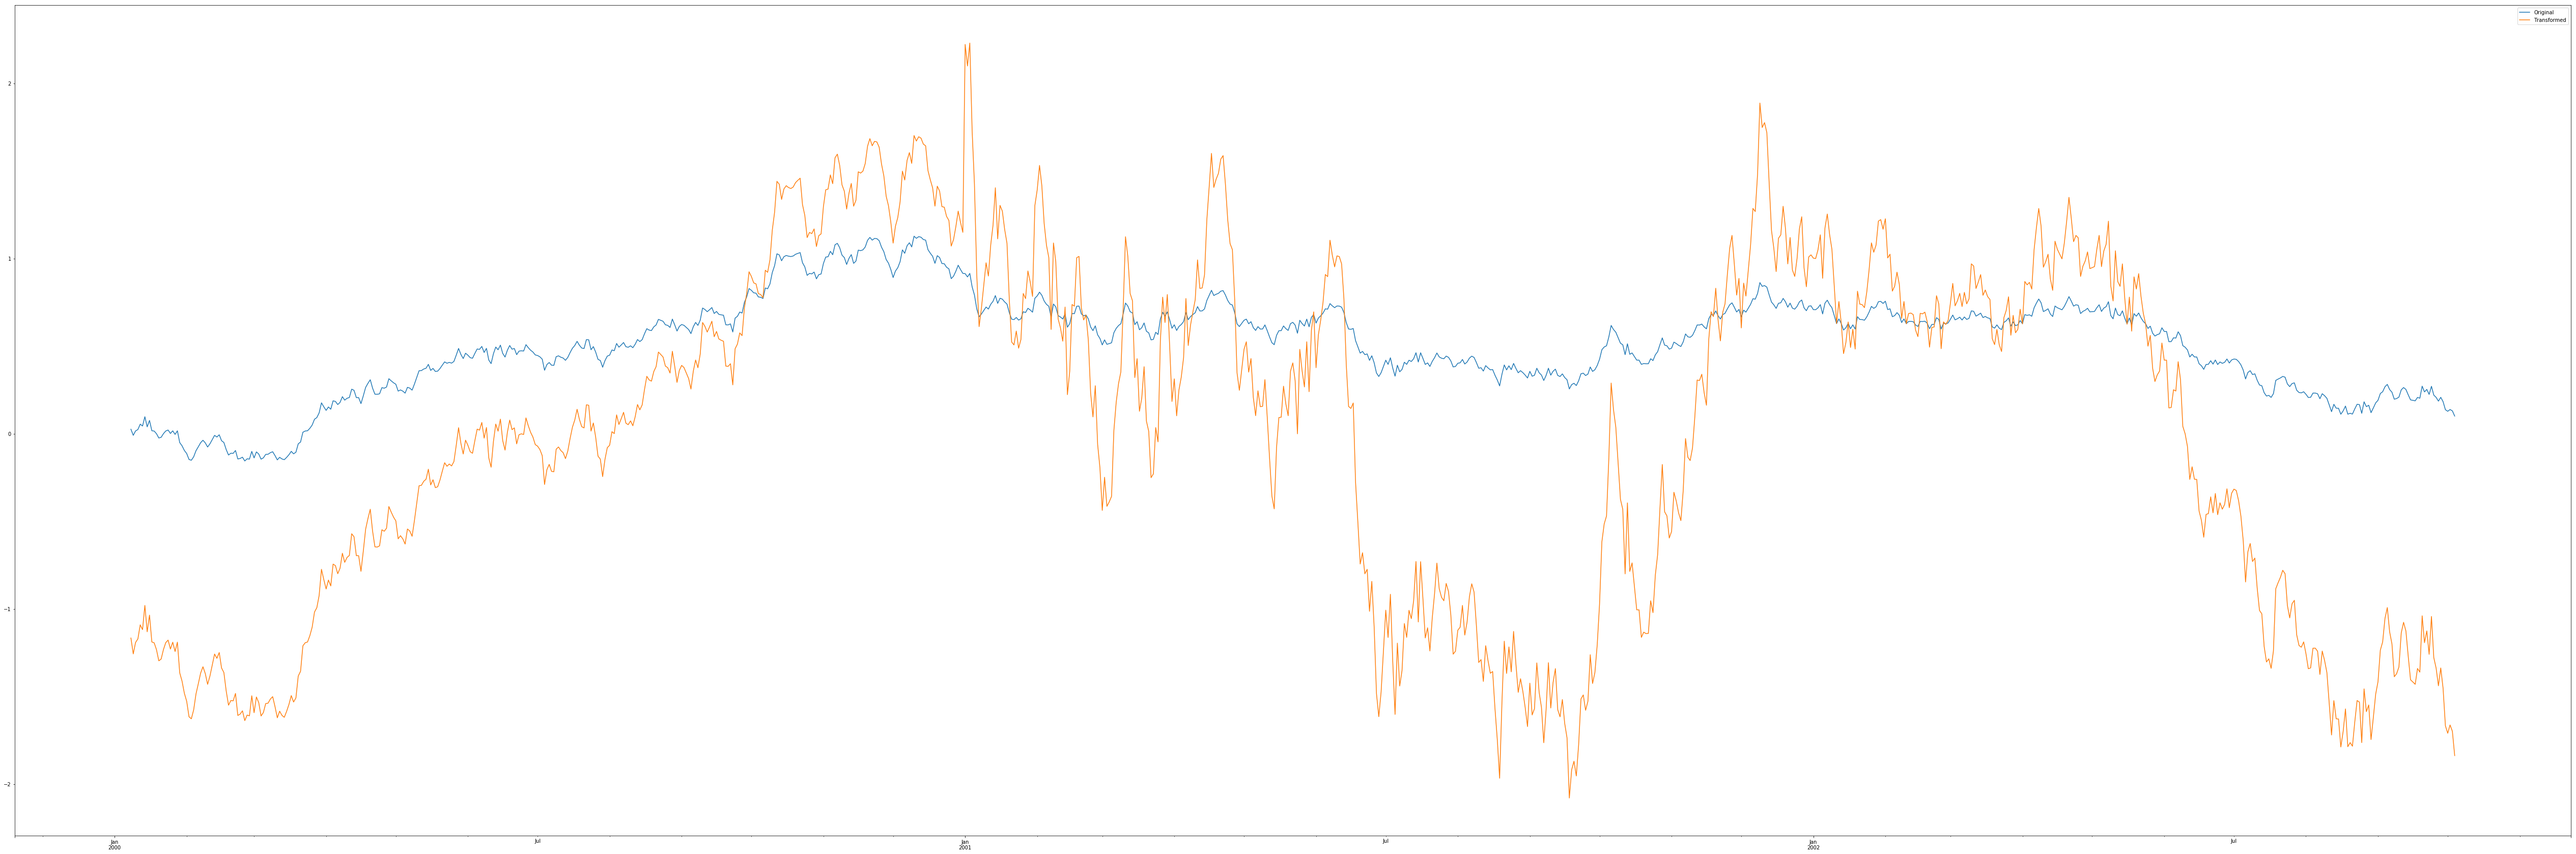

In [117]:
compare.plot(figsize=(90,30))

In [118]:
data_range = lambda x: x.max() - x.min()

In [119]:
ts.groupby(key).transform(data_range)

2000-01-08    1.282800
2000-01-09    1.282800
2000-01-10    1.282800
2000-01-11    1.282800
2000-01-12    1.282800
2000-01-13    1.282800
2000-01-14    1.282800
2000-01-15    1.282800
2000-01-16    1.282800
2000-01-17    1.282800
2000-01-18    1.282800
2000-01-19    1.282800
2000-01-20    1.282800
2000-01-21    1.282800
2000-01-22    1.282800
2000-01-23    1.282800
2000-01-24    1.282800
2000-01-25    1.282800
2000-01-26    1.282800
2000-01-27    1.282800
2000-01-28    1.282800
2000-01-29    1.282800
2000-01-30    1.282800
2000-01-31    1.282800
2000-02-01    1.282800
2000-02-02    1.282800
2000-02-03    1.282800
2000-02-04    1.282800
2000-02-05    1.282800
2000-02-06    1.282800
                ...   
2002-09-05    0.681822
2002-09-06    0.681822
2002-09-07    0.681822
2002-09-08    0.681822
2002-09-09    0.681822
2002-09-10    0.681822
2002-09-11    0.681822
2002-09-12    0.681822
2002-09-13    0.681822
2002-09-14    0.681822
2002-09-15    0.681822
2002-09-16    0.681822
2002-09-17 

In [120]:
ts.groupby(key).transform('max') - ts.groupby(key).transform('min')

2000-01-08    1.282800
2000-01-09    1.282800
2000-01-10    1.282800
2000-01-11    1.282800
2000-01-12    1.282800
2000-01-13    1.282800
2000-01-14    1.282800
2000-01-15    1.282800
2000-01-16    1.282800
2000-01-17    1.282800
2000-01-18    1.282800
2000-01-19    1.282800
2000-01-20    1.282800
2000-01-21    1.282800
2000-01-22    1.282800
2000-01-23    1.282800
2000-01-24    1.282800
2000-01-25    1.282800
2000-01-26    1.282800
2000-01-27    1.282800
2000-01-28    1.282800
2000-01-29    1.282800
2000-01-30    1.282800
2000-01-31    1.282800
2000-02-01    1.282800
2000-02-02    1.282800
2000-02-03    1.282800
2000-02-04    1.282800
2000-02-05    1.282800
2000-02-06    1.282800
                ...   
2002-09-05    0.681822
2002-09-06    0.681822
2002-09-07    0.681822
2002-09-08    0.681822
2002-09-09    0.681822
2002-09-10    0.681822
2002-09-11    0.681822
2002-09-12    0.681822
2002-09-13    0.681822
2002-09-14    0.681822
2002-09-15    0.681822
2002-09-16    0.681822
2002-09-17 

# 9 Filtration

In [123]:
sf = pd.Series([1, 1, 2, 3, 3, 3])

In [124]:
sf.groupby(sf).filter(lambda x: x.sum() > 2)

3    3
4    3
5    3
dtype: int64

In [132]:
dff = pd.DataFrame({'A': np.arange(8), 'B': ['a','a','b','b','b','b','c','c']})

In [133]:
dff

,A,B
0,0,a
1,1,a
2,2,b
3,3,b
4,4,b
5,5,b
6,6,c
7,7,c


In [135]:
dff.groupby('B').filter(lambda x: len(x) > 2)

,A,B
2,2,b
3,3,b
4,4,b
5,5,b


In [136]:
dff.groupby('B').filter(lambda x: len(x) > 2, dropna=False)

,A,B
0,NaN,NaN
1,NaN,NaN
2,2.0,b
3,3.0,b
4,4.0,b
5,5.0,b
6,NaN,NaN
7,NaN,NaN


# 10 Flexible apply

In [138]:
df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C': np.random.randn(8),
    'D': np.random.randn(8)
})
df

,A,B,C,D
0,foo,one,1.004817,0.872372
1,bar,one,-0.299202,-1.454773
2,foo,two,-1.027427,0.208919
3,bar,three,-0.150395,-0.436454
4,foo,two,-2.463890,-0.711223
5,bar,two,0.270863,-0.536109
6,foo,one,-0.056707,0.441510
7,foo,three,-1.042544,1.606326


In [139]:
grouped = df.groupby('A')

In [140]:
grouped['C'].apply(lambda x: x.describe())

A         
bar  count    3.000000
     mean    -0.059578
     std      0.295685
     min     -0.299202
     25%     -0.224799
     50%     -0.150395
     75%      0.060234
     max      0.270863
foo  count    5.000000
     mean    -0.717150
     std      1.289826
     min     -2.463890
     25%     -1.042544
     50%     -1.027427
     75%     -0.056707
     max      1.004817
Name: C, dtype: float64

In [141]:
grouped = df.groupby('A')['C']

In [142]:
def f(group):
    return pd.DataFrame({
        'original': group,
        'demeaned': group - group.mean()
    })


In [144]:
# Este recurso é muito útil
grouped.apply(f)

,demeaned,original
0,1.721967,1.004817
1,-0.239624,-0.299202
2,-0.310277,-1.027427
3,-0.090817,-0.150395
4,-1.746740,-2.463890
5,0.330441,0.270863
6,0.660443,-0.056707
7,-0.325394,-1.042544
